# setup the notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount("/content/drive")

!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)

%cd /content/drive/MyDrive/Colab\ Notebooks/EECS_442_HOI

Mounted at /content/drive
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Looks that a private key is already created. If you have already push it to github, no action required.
 Otherwise, Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAICeyklL46g42c+kOiDGQYpBIkUVa8Oott1qwDIqq8fti root@8ae8a1039f30

Please use SSH method to clone repo.
/content/drive/MyDrive/Colab Notebooks/EECS_442_HOI


In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 11.0 MB/s eta 0:00:00


# loading data

In [8]:
from vcoco.dataloader_human_center import get_train_val_test_loaders
from tqdm import tqdm
from matplotlib import pyplot as plt
import torch
from pipeline import train_model, extract_feature
from MLP_POI import MLP_POI
import torch.optim as optim
import torch.nn as nn
from ultralytics import YOLO
from cnn import CNN
from imageio.v3 import imread
import numpy as np

print("PyTorch Version: ",torch.__version__)
# print("Torchvision Version: ",torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only. If you want to enable GPU, please to go Edit > Notebook Settings > Hardware Accelerator and select GPU.")

PyTorch Version:  2.1.0+cu118


In [12]:
from vcoco.dataloader import get_train_val_test_loaders as gtl_old
train_loader_old, val_loader_old = gtl_old(4, 50, 10)

load hold 1 / 26
total test image number 3608
load image from  0 to 50


100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


load hold 1 / 26
total test image number 3608
load image from  50 to 60


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


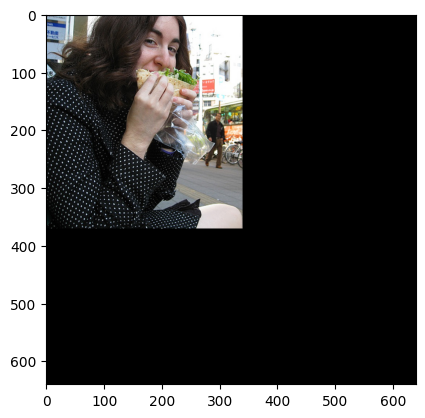

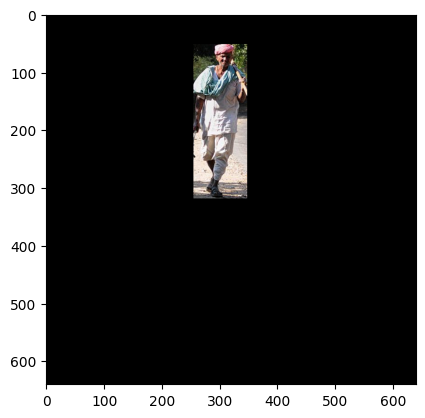

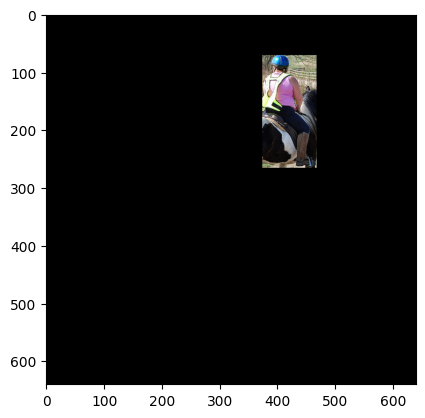

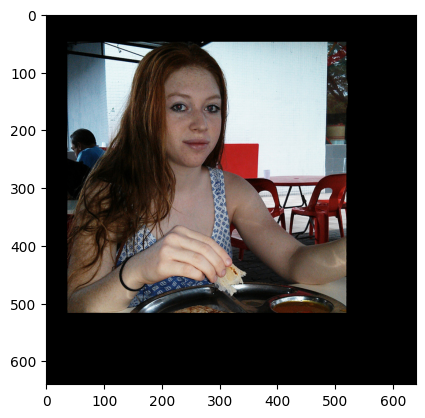

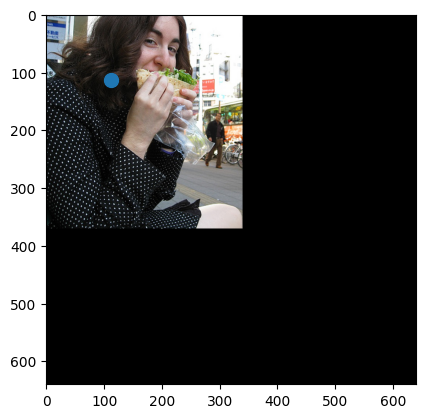

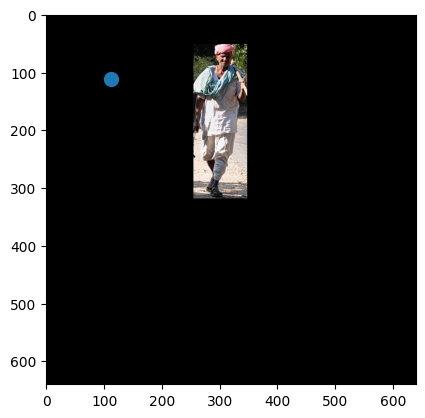

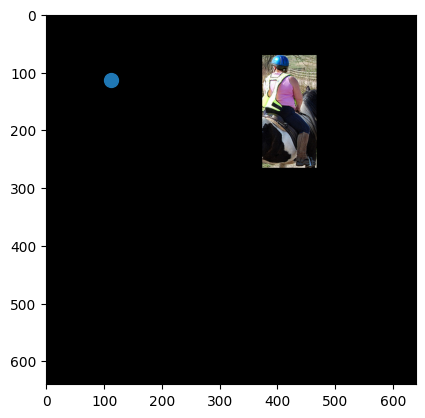

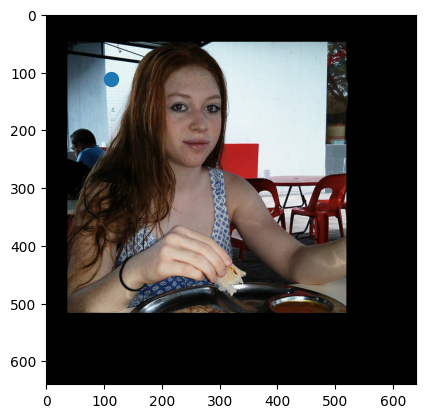

In [13]:
# visualize some data
# load ith batch to varialbe X and y
for i ,(X, y) in enumerate(train_loader_old):

  # print(y[0:5, :]) # print the first 5 labels
  # y = (y).int()
  if i == 0:
    # model = YOLO('yolov8n-pose.pt')  # load an official model
    # results = model(X, verbose=False)
    # print(len(results))
    # Show the results
    for k, r in enumerate(results):
        # X[k] = torch.tensor(r.plot(boxes=False)).permute(2,0,1) / 255  # plot a BGR numpy array of predictions
        # print(X[k].shape)
        # im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        plt.figure()
        plt.imshow(X[k].permute(1,2,0))  # show image

    for j in range(4):
      plt.figure()
      plt.imshow(X[j].permute(1,2,0))
      plt.plot(y[j][0] + 112, y[j][1] + 112, marker='.', markersize=20)

      # plt.figure()
      # plt.imshow(original_image[j])
      # plt.plot(y[j][0] + human_center[j][0], y[j][1] + human_center[j][1], marker='.', markersize=20)

In [9]:
train_loader, val_loader = get_train_val_test_loaders(4, 50, 10)

load hold 1 / 26
total test image number 3608
load image from  0 to 50


100%|██████████| 50/50 [00:27<00:00,  1.83it/s]


load hold 1 / 26
total test image number 3608
load image from  50 to 60


100%|██████████| 10/10 [00:05<00:00,  1.73it/s]



0: 640x640 4 persons, 567.8ms
Speed: 4.1ms preprocess, 567.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
(224, 224, 3)
(224, 224, 3)


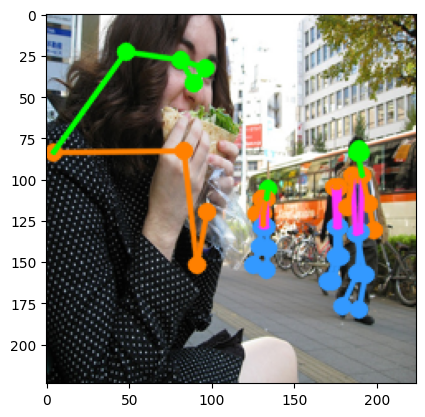

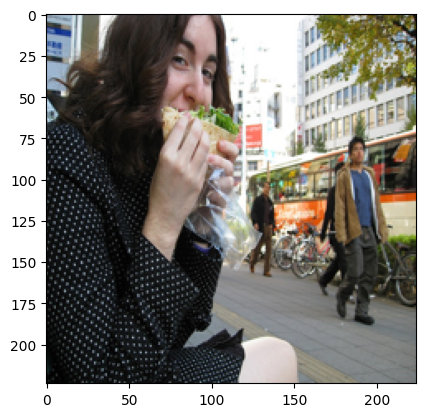

In [ ]:
lfrom PIL import Image
import requests
import numpy as np

model = YOLO('yolov8n-pose.pt')  # load an official model

vcoco_image_url = 'http://images.cocodataset.org/val2014/COCO_val2014_000000293221.jpg'
img = Image.open(requests.get(vcoco_image_url, stream=True).raw)
img = img.resize((224,224))
img = np.array(img)

results = model(img)
# Show the results
for r in results:
    im_array = r.plot(boxes=False)  # plot a BGR numpy array of predictions
    print(im_array.shape)
    # im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    plt.imshow(im_array)  # show image

print(img.shape)
plt.figure()
plt.imshow(img / 255)



## visualize the loaded data

In [15]:
# visualize some data
# load ith batch to varialbe X and y
for i ,(X, y, original_image, human_center) in enumerate(train_loader):

  # print(y[0:5, :]) # print the first 5 labels
  # y = (y).int()
  if i == 0:
    model = YOLO('yolov8n-pose.pt')  # load an official model
    results = model(X, verbose=False)
    # print(len(results))
    # Show the results
    for k, r in enumerate(results):
        X[k] = torch.tensor(r.plot(boxes=False)).permute(2,0,1) / 255  # plot a BGR numpy array of predictions
        # print(X[k].shape)
        # im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        plt.figure()
        plt.imshow(X[k].permute(1,2,0))  # show image

    for j in range(4):
      plt.figure()
      plt.imshow(X[j].permute(1,2,0))
      # plt.plot(y[j][0] + 112, y[j][1] + 112, marker='.', markersize=20)

      plt.figure()
      plt.imshow(original_image[j])
      plt.plot(y[j][0] + human_center[j][0], y[j][1] + human_center[j][1], marker='.', markersize=20)

Output hidden; open in https://colab.research.google.com to view.

# Training interaction propose network

In [ ]:
print("PyTorch Version: ",torch.__version__)
# print("Torchvision Version: ",torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only. If you want to enable GPU, please to go Edit > Notebook Settings > Hardware Accelerator and select GPU.")

dataloaders = {'train': train_loader, 'test': test_loader}

# create MLP
input_size = 2048 * 7 * 7 # size of layer 4 feature
MLP = MLP_POI(input_size, [1024, 512, 2])
MLP = MLP.to(device)

# define constant for hyperparameters
LR = 10 # learning rate
DECAY = 1e-2  #1e-2 # decay rate

optimizer = optim.Adam(MLP.parameters(), lr=LR, weight_decay=DECAY)
criterion = nn.L1Loss()

MLP, _, _ = train_model(MLP, dataloaders, criterion, optimizer, device=device, num_epochs = 25, save_dir=None)

PyTorch Version:  2.1.0+cu118
Using the GPU!
Epoch 0/24
----------


  0%|          | 0/10 [00:00<?, ?it/s]Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth

  0%|          | 0.00/97.8M [00:00<?, ?B/s]
  1%|          | 840k/97.8M [00:00<00:11, 8.57MB/s]
  4%|▍         | 3.90M/97.8M [00:00<00:04, 22.5MB/s]
 12%|█▏        | 11.5M/97.8M [00:00<00:01, 48.7MB/s]
 26%|██▌       | 25.6M/97.8M [00:00<00:00, 87.7MB/s]
 35%|███▌      | 34.6M/97.8M [00:00<00:00, 90.1MB/s]
 46%|████▌     | 44.6M/97.8M [00:00<00:00, 94.8MB/s]
 56%|█████▌    | 54.8M/97.8M [00:00<00:00, 98.7MB/s]
 66%|██████▌   | 64.2M/97.8M [00:00<00:00, 95.5MB/s]
 76%|███████▌  | 73.9M/97.8M [00:00<00:00, 97.1MB/s]
 86%|████████▌ | 83.9M/97.8M [00:01<00:00, 99.6MB/s]
100%|██████████| 97.8M/97.8M [00:01<00:00, 86.2MB/s]
/usr/local/lib/python3.10/dist-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/usr/local/lib/python3.10/dist-packag

train Loss: 104830790959748.2969 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


test Loss: 344.7591 Acc: 0.0000
Epoch 1/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


train Loss: 310.2579 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


test Loss: 348.2658 Acc: 0.0000
Epoch 2/24
----------


100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


train Loss: 314.9848 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


test Loss: 347.1435 Acc: 0.0000
Epoch 3/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


train Loss: 311.8473 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


test Loss: 347.0965 Acc: 0.0000
Epoch 4/24
----------


100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


train Loss: 313.3988 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


test Loss: 347.4642 Acc: 0.0000
Epoch 5/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


train Loss: 312.8123 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


test Loss: 347.1501 Acc: 0.0000
Epoch 6/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


train Loss: 312.9719 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


test Loss: 347.3158 Acc: 0.0000
Epoch 7/24
----------


100%|██████████| 10/10 [00:15<00:00,  1.56s/it]


train Loss: 312.9518 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


test Loss: 347.2838 Acc: 0.0000
Epoch 8/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.36s/it]


train Loss: 313.0140 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


test Loss: 347.3160 Acc: 0.0000
Epoch 9/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


train Loss: 312.9924 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


test Loss: 347.2908 Acc: 0.0000
Epoch 10/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


train Loss: 312.9988 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


test Loss: 347.3087 Acc: 0.0000
Epoch 11/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


train Loss: 313.0015 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


test Loss: 347.2970 Acc: 0.0000
Epoch 12/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


train Loss: 312.9985 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


test Loss: 347.3043 Acc: 0.0000
Epoch 13/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


train Loss: 313.0031 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


test Loss: 347.2999 Acc: 0.0000
Epoch 14/24
----------


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


train Loss: 313.0007 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


test Loss: 347.3025 Acc: 0.0000
Epoch 15/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.30s/it]


train Loss: 313.0035 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


test Loss: 347.3009 Acc: 0.0000
Epoch 16/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


train Loss: 313.0025 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


test Loss: 347.3018 Acc: 0.0000
Epoch 17/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


train Loss: 313.0040 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


test Loss: 347.3012 Acc: 0.0000
Epoch 18/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


train Loss: 313.0038 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


test Loss: 347.3015 Acc: 0.0000
Epoch 19/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


train Loss: 313.0047 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


test Loss: 347.3013 Acc: 0.0000
Epoch 20/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


train Loss: 313.0048 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


test Loss: 347.3014 Acc: 0.0000
Epoch 21/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


train Loss: 313.0053 Acc: 0.0000


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


test Loss: 347.3013 Acc: 0.0000
Epoch 22/24
----------


100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


train Loss: 313.0055 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


test Loss: 347.3013 Acc: 0.0000
Epoch 23/24
----------


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


train Loss: 313.0059 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


test Loss: 347.3012 Acc: 0.0000
Epoch 24/24
----------


100%|██████████| 10/10 [00:12<00:00,  1.25s/it]


train Loss: 313.0061 Acc: 0.0000


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

test Loss: 347.3012 Acc: 0.0000
Best test Acc: 0.000000


## visualize training result

In [ ]:
# visualize result
# load ith batch to varialbe X and y

# visualize result
# load ith batch to varialbe X and y
for j ,(X, y) in enumerate(train_loader):

  features = extract_feature(X.to(device), device)['layer4']
  result = MLP(features)
  result = (result).int()
  print(result)

  y = (y).int()
  print(y)
  for i in range(len(X)):
    plt.figure()
    plt.imshow(X[i].permute(1,2,0))
    plt.plot(result[i][0].cpu().detach().numpy(), result[i][1].cpu().detach().numpy(), marker='.', markersize=20, color='red')
    plt.plot(y[i][0].cpu().detach().numpy(), y[i][1].cpu().detach().numpy(), marker='.', markersize=20, color='blue')



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
criterion = nn.MSELoss()
for i, (inputs, labels) in enumerate(dataloaders['train']):
  if i == 0:
    inputs = inputs[0:4,:].to(device)
    labels = labels[0:4,:].to(device)
    features = extract_feature(inputs, device)['layer4']
    # print(features)
    outputs = MLP(features)
    print(outputs)
    print(labels)
    loss = criterion(outputs, labels)
    print(loss)
    diff = (outputs - labels) * 640
    print(diff)
    norm = torch.linalg.norm(diff, ord=2, dim=1, keepdim=True)
    print(norm)
    norm = torch.sum(norm)
    print(norm)


    break

tensor([[26.8109, 27.2966],
        [26.8109, 27.2966],
        [26.8109, 27.2966],
        [26.8109, 27.2966]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 0.3250,  0.2070],
        [-0.7812, -0.7812],
        [ 0.6263,  0.3759],
        [-0.7812, -0.7812]], device='cuda:0')
tensor(743.1372, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor([[16951.0000, 17337.3086],
        [17658.9883, 17969.8184],
        [16758.1855, 17229.2734],
        [17658.9883, 17969.8184]], device='cuda:0', grad_fn=<MulBackward0>)
tensor([[24247.0352],
        [25194.3301],
        [24035.0703],
        [25194.3301]], device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)
tensor(98670.7656, device='cuda:0', grad_fn=<SumBackward0>)


# training using VGG CNN

In [ ]:
import copy
import os
def train_CNN(model, dataloaders, criterion, optimizer, device='cpu', vis=False, save_dir = None, num_epochs=25, model_name='VGG'):

    val_acc_history = []
    tr_acc_history = []

    val_loss = []
    tr_loss = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    yolo = YOLO('yolov8n-pose.pt')  # load an official model

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            # loss and number of correct prediction for the current batch
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            # TQDM has nice progress bars
            for inputs, labels, _, _ in tqdm(dataloaders[phase]):

                # detecting human pose in the human-centered image
                results = yolo(inputs, verbose=False)
                # replace input images with pose with it
                for k, r in enumerate(results):
                    inputs[k] = torch.tensor(r.plot(boxes=False)).permute(2,0,1) / 255  # plot a BGR numpy array of predictions

                inputs = inputs.to(device).float() * 255
                labels = labels.to(device).float()

                optimizer.zero_grad() # zero the grad

                # predict the point of interest
                outputs = model(inputs)

                # compute loss
                # preds = torch.argmax(outputs, dim=1)
                loss = criterion(outputs, labels)

                # print(inputs[0,0,0,0])
                # print(type(loss))
                # print(type(labels))
                if phase == 'train':
                  loss.backward()
                  optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)

                # hard code correct constraint
                # if difference of l2 norm between GT poi and pred poi < 50
                diff = torch.linalg.norm((outputs - labels), ord=2, dim=1)
                correct_pred = torch.where(diff < 100, 1, 0)
                running_corrects += torch.count_nonzero(correct_pred)

                torch.cuda.empty_cache()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))



            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

                # visualize the prediction result
                if vis:
                  for i in len(inputs):
                    plt.figure()
                    plt.imshow[inputs[i].permute(1,2,0)]
                    plt.plot(labels[0][0], labels[0][1], marker='.', markersize=20)

                if save_dir:
                    torch.save(best_model_wts, os.path.join(save_dir, model_name + '.pth'))

            # record the train/val accuracies
            if phase == 'val':
                val_acc_history.append(epoch_acc)
                val_loss.append(epoch_loss)
            else:
                tr_acc_history.append(epoch_acc)
                tr_loss.append(epoch_loss)

    print('Best test Acc: {:4f}'.format(best_acc))

    return model, tr_acc_history, val_acc_history, tr_loss, val_loss

In [ ]:
dataloaders = {'train': train_loader, 'val': val_loader}

# create MLP
model = CNN().to(device)

# define constant for hyperparameters
LR = 1e-2 # learning rate
DECAY = 1e-2  #1e-2 # decay rate
num_epochs = 10

optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=DECAY)
# criterion = nn.L1Loss()
criterion = nn.MSELoss()


model_trained, train_his, val_his, train_loss, val_loss = train_CNN(model, dataloaders, criterion, optimizer, device=device, num_epochs = num_epochs, save_dir='weights/', model_name='interactive_net_0')

Epoch 0/9
----------


100%|██████████| 125/125 [00:11<00:00, 10.61it/s]


train Loss: 54543.2588 Acc: 0.2240


100%|██████████| 13/13 [00:01<00:00,  9.94it/s]


val Loss: 36026.7823 Acc: 0.3000
Epoch 1/9
----------


100%|██████████| 125/125 [00:11<00:00, 11.22it/s]


train Loss: 52748.3906 Acc: 0.1940


100%|██████████| 13/13 [00:01<00:00, 10.19it/s]


val Loss: 37047.6710 Acc: 0.3000
Epoch 2/9
----------


100%|██████████| 125/125 [00:12<00:00, 10.19it/s]


train Loss: 49260.2862 Acc: 0.1680


100%|██████████| 13/13 [00:01<00:00, 12.23it/s]


val Loss: 37813.6247 Acc: 0.2800
Epoch 3/9
----------


100%|██████████| 125/125 [00:12<00:00,  9.91it/s]


train Loss: 50763.1704 Acc: 0.1680


100%|██████████| 13/13 [00:01<00:00, 11.73it/s]


val Loss: 38496.4463 Acc: 0.3000
Epoch 4/9
----------


100%|██████████| 125/125 [00:11<00:00, 10.42it/s]


train Loss: 49534.3565 Acc: 0.1940


100%|██████████| 13/13 [00:01<00:00, 12.27it/s]


val Loss: 40926.2038 Acc: 0.2800
Epoch 5/9
----------


100%|██████████| 125/125 [00:11<00:00, 10.75it/s]


train Loss: 51515.3983 Acc: 0.2140


100%|██████████| 13/13 [00:01<00:00,  9.97it/s]


val Loss: 38917.9666 Acc: 0.3800
Epoch 6/9
----------


100%|██████████| 125/125 [00:10<00:00, 11.37it/s]


train Loss: 48621.4831 Acc: 0.2080


100%|██████████| 13/13 [00:01<00:00,  9.80it/s]


val Loss: 39933.5153 Acc: 0.3200
Epoch 7/9
----------


100%|██████████| 125/125 [00:11<00:00, 10.91it/s]


train Loss: 49910.9488 Acc: 0.2480


100%|██████████| 13/13 [00:01<00:00, 12.43it/s]


val Loss: 43236.1683 Acc: 0.2800
Epoch 8/9
----------


100%|██████████| 125/125 [00:12<00:00, 10.35it/s]


train Loss: 47328.6710 Acc: 0.2160


100%|██████████| 13/13 [00:01<00:00, 12.44it/s]


val Loss: 42969.3968 Acc: 0.3000
Epoch 9/9
----------


100%|██████████| 125/125 [00:11<00:00, 10.56it/s]


train Loss: 47209.0591 Acc: 0.2320


100%|██████████| 13/13 [00:01<00:00, 12.36it/s]

val Loss: 47083.2098 Acc: 0.2800
Best test Acc: 0.380000


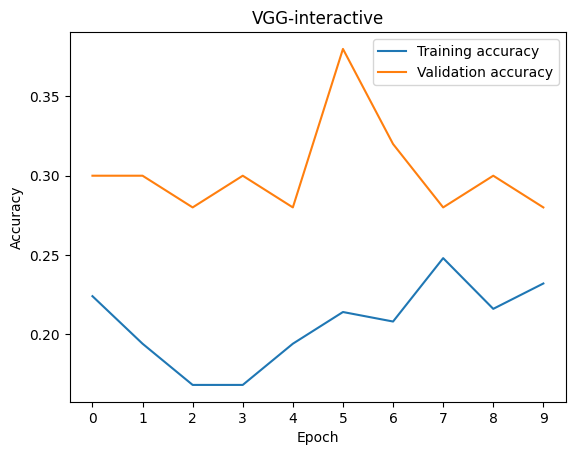

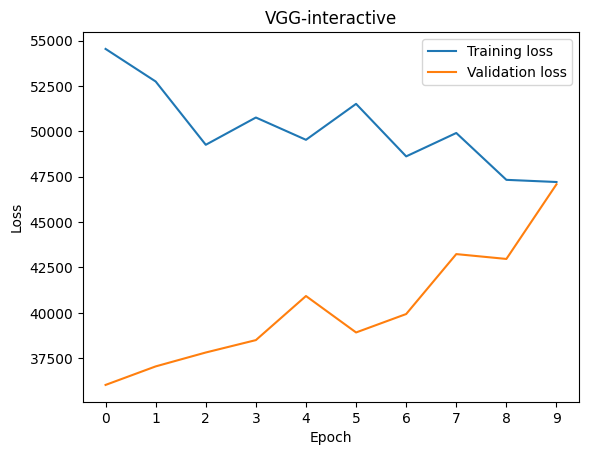

In [ ]:
x = np.arange(num_epochs)
# plot accuracy
plt.figure()
plt.plot(x, torch.tensor(train_his, device = 'cpu'))
plt.plot(x, torch.tensor(val_his, device = 'cpu'))
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.xticks(x)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VGG-interactive')
plt.show()

# plot loss
plt.figure()
plt.plot(x, torch.tensor(train_loss, device = 'cpu'))
plt.plot(x, torch.tensor(val_loss, device = 'cpu'))
plt.legend(['Training loss', 'Validation loss'])
plt.xticks(x)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VGG-interactive')
plt.show()

In [ ]:
# model_trained = CNN().to(device)
# model_trained.load_state_dict(torch.load('./weights/VGG.pth'))

# visualize some data
# load ith batch to varialbe X and y
for j ,(X, y, original_image, human_center) in enumerate(train_loader):

  if j == 4:
    break

  result = model_trained(X.float().to(device)*255)
  result = (result).int()

  # print(y[0:5, :]) # print the first 5 labels
  # y = (y).int()

  for i in range(len(X)):
    plt.figure()
    plt.imshow(X[i].permute(1,2,0))
    plt.plot(y[i][0] + 112, y[i][1] + 112, marker='.', markersize=20)
    plt.plot(result[i][0].cpu().detach().numpy(),
            result[i][1].cpu().detach().numpy(),
            marker='.',
            markersize=20,
            color='red')

    plt.figure()
    plt.imshow(original_image[i])
    plt.plot(result[i][0].cpu().detach().numpy() + human_center[i][0].detach().numpy(),
            result[i][1].cpu().detach().numpy() + human_center[i][1].detach().numpy(),
            marker='.',
            markersize=20,
            color='red')
    plt.plot(y[i][0].cpu().detach().numpy() + human_center[i][0].detach().numpy(),
            y[i][1].cpu().detach().numpy() + human_center[i][1].detach().numpy(),
            marker='.',
            markersize=20,
            color='blue')


# visualize result
# load ith batch to varialbe X and y
# for j ,(X, y) in enumerate(train_loader):

#   if j == 4:
#     break

#   result = model_trained(X.float().to(device)*255)
#   result = (result).int()
#   print(result)

#   y = (y * 640).int()
#   print(y)
#   for i in range(len(X)):
#     plt.figure()
#     plt.imshow(X[i].permute(1,2,0))
#     plt.plot(result[i][0].cpu().detach().numpy(), result[i][1].cpu().detach().numpy(), marker='.', markersize=20, color='red')
#     plt.plot(y[i][0].cpu().detach().numpy(), y[i][1].cpu().detach().numpy(), marker='.', markersize=20, color='blue')

# torch.cuda.empty_cache()

Output hidden; open in https://colab.research.google.com to view.